# Scaling-Up matrix multiplication

In [1]:
import dask.array as da
from dask.distributed import Client
import time
from scale_cluster import init_cluster
from scale_cluster import kill_cluster
import numpy as np

In [2]:
# Settings Init Cluster
max_workers = 3  # It depends settings cluster
max_cores_by_workers = 10

# Settings Init Matrix
n_rows_x = 100000
n_col_x = 200000
n_rows_y = 200000
n_col_y = 100000

# Init vars matrix
x_1 = da.ones((n_rows_x,n_col_x))
y_1 = da.ones((n_rows_y,n_col_y))
sequential_time = 4
speed_ups = []
#mult = da.matmul(x_1,y_1)
#res = mult.compute()
#rescgt ufh 

### Get time sequential

In [3]:
init_cluster('170.210.103.20', str(1), str(24))
time.sleep(5)
client = Client('170.210.103.20:8786')
print(client)

# Execute task
t = time.time()
mult = da.matmul(x_1,y_1)
m = client.compute(mult)
#res = mult.compute()
res = m.result()
sequential_time = time.time()-t
print('Result:')
print(res)
print('With nodes:3 '+'cores_by_workers: '+str(1)+ '\tTime: '+ str(sequential_time))    
print('----------------------------------------------------------')
kill_cluster('170.210.103.20')
time.sleep(10)

<Client: scheduler='tcp://170.210.103.20:8786' processes=23 cores=552>


/home/mario/dask/lib/python3.6/site-packages/dask/array/routines.py:283: PerformanceWarning: Increasing number of chunks by factor of 25
  concatenate=True


MemoryError: 

### Get Speed_Ups

In [4]:
for j in range(1,max_cores_by_workers+1):    
    init_cluster('170.210.103.20', str(3), str(j))
    time.sleep(5)
    client = Client('170.210.103.20:8786')
    print(client)
    # Execute task
    t = time.time()
    mult = da.matmul(x_1,y_1)
    res = mult.compute()
    t1 = time.time()-t
    speed_ups.append(t1/sequential_time)
    print(res)
    print('With nodes:3 '+'cores_by_workers: '+str(j)+ '\tTime: '+ str(t1))    
    print('----------------------------------------------------------')
    kill_cluster('170.210.103.20')
    time.sleep(10)

<Client: scheduler='tcp://170.210.103.20:8786' processes=3 cores=3>
[[2000 2000 2000 ... 2000 2000 2000]
 [2000 2000 2000 ... 2000 2000 2000]
 [2000 2000 2000 ... 2000 2000 2000]
 ...
 [2000 2000 2000 ... 2000 2000 2000]
 [2000 2000 2000 ... 2000 2000 2000]
 [2000 2000 2000 ... 2000 2000 2000]]
With nodes:3 cores_by_workers: 1	Time: 17.905235052108765
----------------------------------------------------------
<Client: scheduler='tcp://170.210.103.20:8786' processes=3 cores=6>
[[2000 2000 2000 ... 2000 2000 2000]
 [2000 2000 2000 ... 2000 2000 2000]
 [2000 2000 2000 ... 2000 2000 2000]
 ...
 [2000 2000 2000 ... 2000 2000 2000]
 [2000 2000 2000 ... 2000 2000 2000]
 [2000 2000 2000 ... 2000 2000 2000]]
With nodes:3 cores_by_workers: 2	Time: 17.810452461242676
----------------------------------------------------------
<Client: scheduler='tcp://170.210.103.20:8786' processes=3 cores=9>
[[2000 2000 2000 ... 2000 2000 2000]
 [2000 2000 2000 ... 2000 2000 2000]
 [2000 2000 2000 ... 2000 2000 2

### Plot Speed-Ups

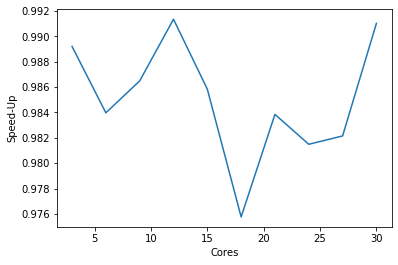

tornado.application - ERROR - Exception in callback <bound method Client._heartbeat of <Client: scheduler='tcp://170.210.103.20:8786' processes=3 cores=6>>
Traceback (most recent call last):
  File "/home/mario/dask/lib/python3.6/site-packages/tornado/ioloop.py", line 1229, in _run
    return self.callback()
  File "/home/mario/dask/lib/python3.6/site-packages/distributed/client.py", line 930, in _heartbeat
    self.scheduler_comm.send({'op': 'heartbeat-client'})
  File "/home/mario/dask/lib/python3.6/site-packages/distributed/batched.py", line 117, in send
    raise CommClosedError
distributed.comm.core.CommClosedError
tornado.application - ERROR - Exception in callback <bound method Client._heartbeat of <Client: scheduler='tcp://170.210.103.20:8786' processes=3 cores=63>>
Traceback (most recent call last):
  File "/home/mario/dask/lib/python3.6/site-packages/tornado/ioloop.py", line 1229, in _run
    return self.callback()
  File "/home/mario/dask/lib/python3.6/site-packages/distribu

In [6]:
import matplotlib.pyplot as plt
cores = 3
x = []
for s in speed_ups:
    x.append(cores)
    cores += 3
plt.plot(x, speed_ups)
plt.ylabel('Speed-Up')
plt.xlabel('Cores')
plt.show()